In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [5]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

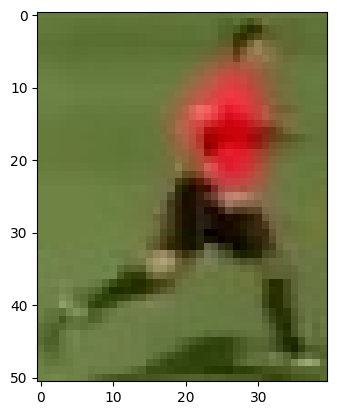

In [7]:
plt.imshow(image)
plt.show()

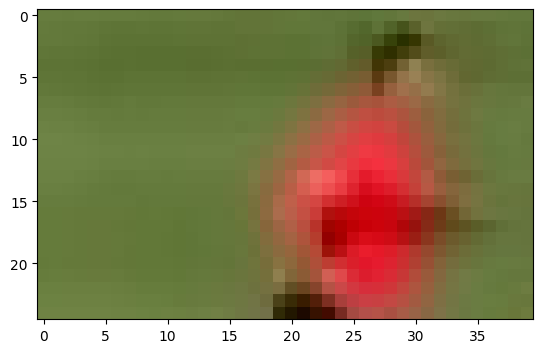

In [8]:
top_half_image = image[0: int(image.shape[0] / 2):, :]
plt.imshow(top_half_image)
plt.show()

# Cluster image into two clusters

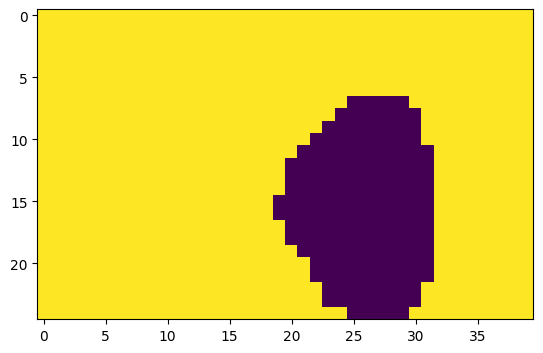

In [12]:
image_2d = top_half_image.reshape((-1, 3))

# perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels to the shape of the top half image
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display the clustered image
plt.imshow(clustered_image)
plt.show()


In [14]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [15]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [16]:
kmeans.cluster_centers_[player_cluster]

array([194.16292135,  58.44382022,  52.38764045])